# Creating Figures to Visualize Registration Accuracy
#### August 1, 2022

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.lines import Line2D
import os
import glob
import torch

import nrrd
import time
#import seaborn as sns
#sns.set("poster")

import tools
import time
import datetime

import imp
imp.reload(tools)

/nafs/dtward/torch_venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses


<module 'tools' from '/ifshome/oamiuwu/rasterization_work/tools.py'>

In [3]:
rast_data = [0]*9

slice_names = ['S1R1','S1R2','S1R3','S2R1','S2R2','S2R3','S3R1','S3R2','S3R3']

for i in range(9):
    rast_data[i] = np.load(f"/nafs/dtward/stalign/pca/{slice_names[i]}_arrays.npz")

rast_data[0].files

['X', 'Y', 'W', 'V', 'Z', 'I_pca', 'I_rgb', 'screefig', 'rgbfig']

In [4]:
#row/col order
points_s1r1 = np.array([[28,156],[34,193],[49,168],[84,109],[106,234],[193,163],
                       [171,99],[172,237],[195,86],[199,249],[126,43],[134,289]])
points_s1r2 = np.array([[160,58],[121,82],[149,83],[228,84],[112,153],[213,202],
                       [271,165],[158,233],[292,177],[161,254],[300,82],[71,218]])
points_s1r3 = np.array([[102,79],[78,106],[102,103],[166,82],[83,185],[198,207],
                       [233,155],[141,248],[255,160],[144,270],[239,66],[56,243]])
points_s2r1 = np.array([[22,179],[29,205],[95,169],[71,128],[102,228],[224,136],
                       [115,104],[150,220],[105,54],[182,264],[87,149],[99,197],[183,149]])
points_s2r2 = np.array([[250,240],[268,222],[210,179],[165,242],[264,144],[100,102],
                       [130,214],[221,115],[93,247],[245,62],[180,208],[230,158],[135,132]])
points_s2r3 = np.array([[233,173],[231,146],[166,166],[182,227],[167,101],[36,175],
                       [141,231],[126,104],[121,282],[112,55],[169,201],[164,132],[78,172]])
points_s3r1 = np.array([[103,50],[90,58],[135,105],[156,85],[112,119],[194,189],
                       [223,78],[82,188],[257,139],[133,237],[214,178],[178,205]])
points_s3r2 = np.array([[28,174],[32,192],[85,176],[77,121],[94,222],[197,142],
                       [117,50],[154,266],[182,59],[214,223],[204,107],[218,166]])
points_s3r3 = np.array([[176,239],[197,223],[159,175],[141,185],[192,162],[112,71],
                       [56,176],[235,75],[46,99],[180,32],[82,76],[145,40]])
points = [points_s1r1,points_s1r2,points_s1r3,
          points_s2r1,points_s2r2,points_s2r3,
          points_s3r1,points_s3r2,points_s3r3]
points = [p*30. for p in points]

In [5]:
#for reference
#fig,ax = plt.subplots()
#ax.plot(range(1,7),rast_data[0]['W'][:6],linewidth=1,marker="o",label="test1",c="r")
#plt.errorbar(range(1,7),rast_data[0]['W'][:6],yerr=[.1]*6,linewidth=1,capsize=2.0,ls="",c="r")
#ax.plot(range(1,7),rast_data[1]['W'][:6],linewidth=1,marker="s",label="test2")
#plt.legend()

<IPython.core.display.Javascript object>


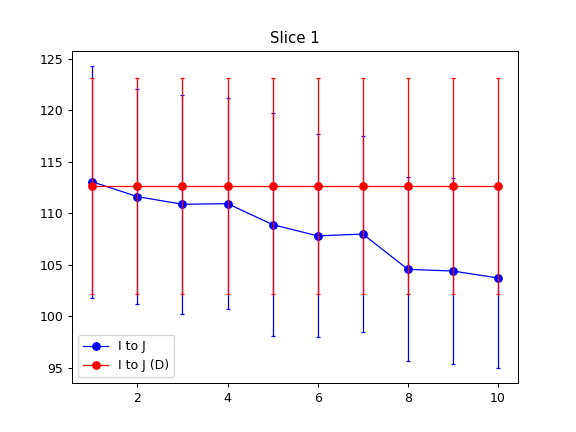

<IPython.core.display.Javascript object>


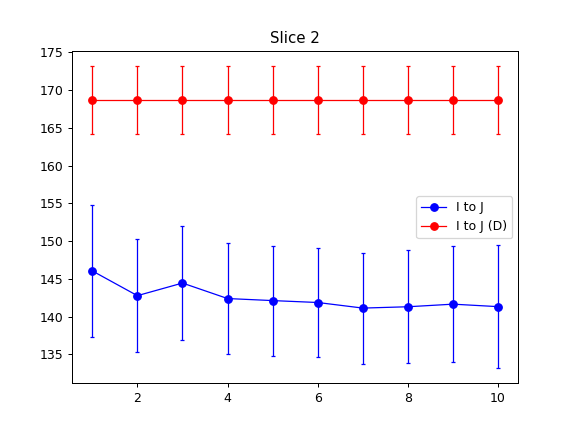

<IPython.core.display.Javascript object>


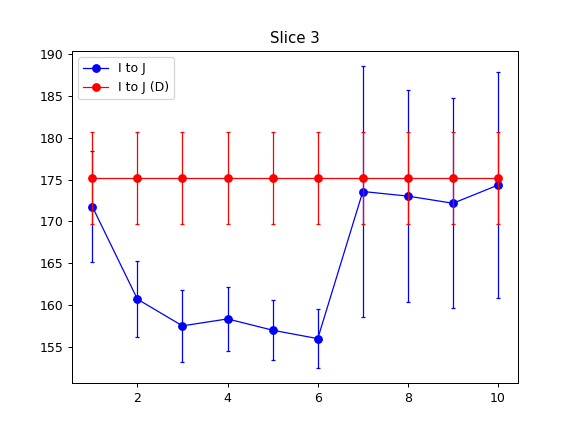

In [6]:
i=0
j=1
pcs=10
colors = ["b",'g','r','c','m','y']
for x in range(3): #loops through each slice
    fig,ax = plt.subplots()
    meanTRE = np.zeros((6,pcs,2))
    density_meanTRE = np.zeros((6,2))
    
    for y in range(3): #loops through each replicate of slice as atlas
        for z in range(2): #loops through other 2 replicates of each slice as target
            j=(j+z)%3 + 3*x
            c = 2*y + z
            
            for p in range(0,pcs):
                data = np.load(f"/nafs/dtward/stalign/accuracy_noPoints/{slice_names[i]}" + 
                               f"_to_{slice_names[j]}_transform_{p+1}_PCs_noPoints.npz")
                meanTRE[c,p,0], ran = tools.calculate_tre(data['phipointsI'], points[j])
                meanTRE[c,p,1], ran = tools.calculate_tre(data['phiipointsJ'], points[i])
            
            data = np.load(f"/nafs/dtward/stalign/accuracy_noPoints/{slice_names[i]}" + 
                           f"_to_{slice_names[j]}_density_transform_noPoints.npz")
            density_meanTRE[c,0], ran = tools.calculate_tre(data['phipointsI'], points[j])
            density_meanTRE[c,1], ran = tools.calculate_tre(data['phiipointsJ'], points[i])
            
        i+=1
        j=i+1
    
    # standard error of the mean
    stdTRE = np.std(meanTRE,axis=0) / np.sqrt(6)
    meanTRE = np.mean(meanTRE,axis=0)
    density_stdTRE = np.resize(np.std(density_meanTRE,axis=0),(10,2)) / np.sqrt(6)
    density_meanTRE = np.resize(np.mean(density_meanTRE,axis=0),(10,2))
            
    ax.plot(range(1,pcs+1),meanTRE[:,0],linewidth=1,marker="o",c=colors[0],label="I to J")
    plt.errorbar(range(1,pcs+1),meanTRE[:,0],yerr=stdTRE[:,0],linewidth=1,capsize=2.0,ls="",c=colors[0])
    #ax.plot(range(1,pcs+1),meanTRE[:,1],linewidth=1,marker="s",c=colors[1],label="J to I")
    #plt.errorbar(range(1,pcs+1),meanTRE[:,1],yerr=stdTRE[:,1],linewidth=1,capsize=2.0,ls="",c=colors[1])
    
    ax.plot(range(1,pcs+1),density_meanTRE[:,0],linewidth=1,marker="o",c=colors[2],label="I to J (D)")
    plt.errorbar(range(1,pcs+1),density_meanTRE[:,0],yerr=density_stdTRE[:,0],linewidth=1,capsize=2.0,ls="",c=colors[2])
    #ax.plot(range(1,pcs+1),density_meanTRE[:,1],linewidth=1,marker="s",c=colors[3],label="J to I (D)")
    #plt.errorbar(range(1,pcs+1),density_meanTRE[:,1],yerr=density_stdTRE[:,1],linewidth=1,capsize=2.0,ls="",c=colors[3])
    
    ax.set_title(f"Slice {x+1}")

    plt.legend()